In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter


In [2]:
df=pd.read_csv("Revenue.csv")

In [3]:
df.head()

,Unnamed: 0,Date,Cost,Install,Time Spent,LvL Start,LvL Win,Ego Buy,Ego Buyer %,Purchaser %,Booster Use,Booster User %,Session Ct,Revenue (1),Revenue (30),Tier
0,0,2022-01-17,225703.545986,8914,46.765637,46.557085,46.321319,5.207472,0.474524,0.010419,10.151321,0.505193,1.747202,75.848224,16392.745706,US
1,1,2022-01-18,271264.586668,10997,68.295471,67.137999,64.090265,5.853417,0.512700,0.010415,10.198732,0.604252,2.552975,862.921625,62540.877022,US
2,2,2022-01-19,264563.571613,10282,52.384714,48.778187,43.144629,2.358747,0.511219,0.008328,11.894883,0.527490,2.877706,860.488583,53348.222177,US
3,3,2022-01-20,217767.392507,8493,63.777046,49.200997,48.427025,1.567209,0.537931,0.011300,8.152441,0.708686,2.918057,83.214212,17027.763142,US
4,4,2022-01-21,191877.037731,9421,48.125667,52.568294,46.286220,6.161556,0.496780,0.008699,10.951275,0.584545,3.257699,1891.807282,92120.019391,US


In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            3240 non-null   object 
 1   Cost            3240 non-null   float64
 2   Install         3240 non-null   int64  
 3   Time Spent      3240 non-null   float64
 4   LvL Start       3240 non-null   float64
 5   LvL Win         3240 non-null   float64
 6   Ego Buy         3240 non-null   float64
 7   Ego Buyer %     3240 non-null   float64
 8   Purchaser %     3240 non-null   float64
 9   Booster Use     3240 non-null   float64
 10  Booster User %  3240 non-null   float64
 11  Session Ct      3240 non-null   float64
 12  Revenue (1)     3240 non-null   float64
 13  Revenue (30)    3240 non-null   float64
 14  Tier            3240 non-null   object 
dtypes: float64(12), int64(1), object(2)
memory usage: 379.8+ KB


In [6]:
df.describe()

,Cost,Install,Time Spent,LvL Start,LvL Win,Ego Buy,Ego Buyer %,Purchaser %,Booster Use,Booster User %,Session Ct,Revenue (1),Revenue (30)
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,201250.379278,9961.485185,60.181937,55.590704,50.082300,4.126492,0.499636,0.010079,9.879978,0.702692,1.854663,869.042484,59762.128797
std,153155.127564,994.747903,9.859519,10.758866,10.195385,1.954714,0.029531,0.001409,3.200545,0.114552,0.852600,1281.341736,74764.796903
min,-50184.241964,6768.000000,30.799707,25.664164,23.985684,0.204313,0.424609,0.005275,2.818319,0.500243,1.000000,0.051923,548.909159
25%,45789.321899,9307.750000,53.616797,47.922064,42.588015,2.680299,0.480718,0.009133,7.619546,0.605894,1.000000,31.412701,4720.656858
50%,197052.179219,9965.000000,60.347444,54.684514,49.759456,3.824303,0.498019,0.010011,9.820819,0.703873,1.787244,355.849840,35023.389760
75%,317053.192566,10665.750000,66.662910,63.145558,56.483990,5.255280,0.519915,0.011048,11.961283,0.803491,2.196331,1182.072554,83638.971822
max,613846.710817,13571.000000,87.919712,93.747925,87.976848,11.130409,0.609722,0.014634,20.110051,0.899805,5.656932,13886.361011,807706.528780


In [7]:
df.isnull().sum() #zaten 0

Date              0
Cost              0
Install           0
Time Spent        0
LvL Start         0
LvL Win           0
Ego Buy           0
Ego Buyer %       0
Purchaser %       0
Booster Use       0
Booster User %    0
Session Ct        0
Revenue (1)       0
Revenue (30)      0
Tier              0
dtype: int64

In [8]:
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
df[df["Cost"]<0] # Cost neden 0'dan küçük?

,Date,Cost,Install,Time Spent,LvL Start,LvL Win,Ego Buy,Ego Buyer %,Purchaser %,Booster Use,Booster User %,Session Ct,Revenue (1),Revenue (30),Tier
2164,2022-01-21,-34960.385809,9421,48.125667,52.568294,46.286220,6.161556,0.496780,0.008699,10.951275,0.584545,3.257699,11.468400,1128.616496,Row
2173,2022-01-30,-26548.465880,9361,54.318607,42.225252,41.154242,2.877093,0.545638,0.011549,6.910939,0.727855,2.826617,1.994149,698.065261,Row
2175,2022-02-01,-22919.394420,9565,75.801036,61.818667,55.353809,4.073722,0.500829,0.008315,4.006522,0.859857,3.213923,7.971626,1144.307194,Row
2180,2022-02-06,-2316.058839,10737,41.526730,31.866936,26.784084,2.995205,0.503572,0.010529,12.895598,0.516326,3.278962,15.406435,1364.257909,Row
2187,2022-02-13,-1084.760157,8571,66.658774,72.061024,63.538001,4.972864,0.464760,0.010342,8.223768,0.766065,2.509162,9.602386,1150.010703,Row
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,2024-01-12,-6652.377097,11848,51.758008,47.526596,39.386172,6.005919,0.486843,0.008241,8.983045,0.738285,1.662663,81.909025,7692.268345,Row
2995,2024-05-01,-3716.815133,9982,59.246651,54.837335,50.491670,4.861272,0.546092,0.009381,12.084637,0.500243,5.318395,30.468398,4866.376325,Row
2998,2024-05-04,-8790.477939,9770,70.159170,75.768285,62.423573,3.153588,0.535433,0.014216,6.828677,0.689628,3.253514,49.060771,6457.818392,Row
3030,2024-06-05,-15045.502293,10330,66.161786,57.756276,56.231052,5.772387,0.480735,0.007620,11.682888,0.687360,2.858603,11.198641,3824.658455,Row


In [10]:
df = df[df["Cost"] >= 0].reset_index(drop=True)


Feature Engineering

In [11]:
#Average Revenue per User
df["ARPU"] = df["Revenue (30)"] / df["Install"]

# level kazanma oranı
df["Level_win_rate"] = df["LvL Win"] / df["LvL Start"]

#ROI 1'den büyükse kar ediliyor, küçükse zarar
df["ROI"] = df["Revenue (30)"] / df["Cost"]

# Cost per Install
df["CPI"] = df["Cost"] / df["Install"]

In [12]:
df

,Date,Cost,Install,Time Spent,LvL Start,LvL Win,Ego Buy,Ego Buyer %,Purchaser %,Booster Use,Booster User %,Session Ct,Revenue (1),Revenue (30),Tier,ARPU,Level_win_rate,ROI,CPI
0,2022-01-17,225703.545986,8914,46.765637,46.557085,46.321319,5.207472,0.474524,0.010419,10.151321,0.505193,1.747202,75.848224,16392.745706,US,1.838989,0.994936,0.072630,25.320120
1,2022-01-18,271264.586668,10997,68.295471,67.137999,64.090265,5.853417,0.512700,0.010415,10.198732,0.604252,2.552975,862.921625,62540.877022,US,5.687085,0.954605,0.230553,24.667144
2,2022-01-19,264563.571613,10282,52.384714,48.778187,43.144629,2.358747,0.511219,0.008328,11.894883,0.527490,2.877706,860.488583,53348.222177,US,5.188506,0.884507,0.201646,25.730750
3,2022-01-20,217767.392507,8493,63.777046,49.200997,48.427025,1.567209,0.537931,0.011300,8.152441,0.708686,2.918057,83.214212,17027.763142,US,2.004917,0.984269,0.078192,25.640809
4,2022-01-21,191877.037731,9421,48.125667,52.568294,46.286220,6.161556,0.496780,0.008699,10.951275,0.584545,3.257699,1891.807282,92120.019391,US,9.778157,0.880497,0.480099,20.366950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,2024-12-27,29871.487592,7885,56.757400,50.524013,43.354424,7.753408,0.498584,0.007364,12.190574,0.832305,2.580885,72.530415,7586.429693,Row,0.962134,0.858095,0.253969,3.788394
3141,2024-12-28,38408.846079,9999,58.063842,58.092408,56.936882,4.481012,0.495516,0.014634,13.245431,0.500557,1.000000,11.421061,4346.944708,Row,0.434738,0.980109,0.113176,3.841269
3142,2024-12-29,40177.371394,8818,58.332729,56.251509,49.830228,5.398398,0.572386,0.009911,8.942436,0.735413,1.546474,52.870697,6845.652304,Row,0.776327,0.885847,0.170386,4.556291
3143,2024-12-30,38678.204077,10299,69.058530,75.754094,67.236099,5.504687,0.548464,0.011892,11.233088,0.708544,1.000000,60.131919,8364.000216,Row,0.812118,0.887557,0.216246,3.755530


** Görselleştimeler **

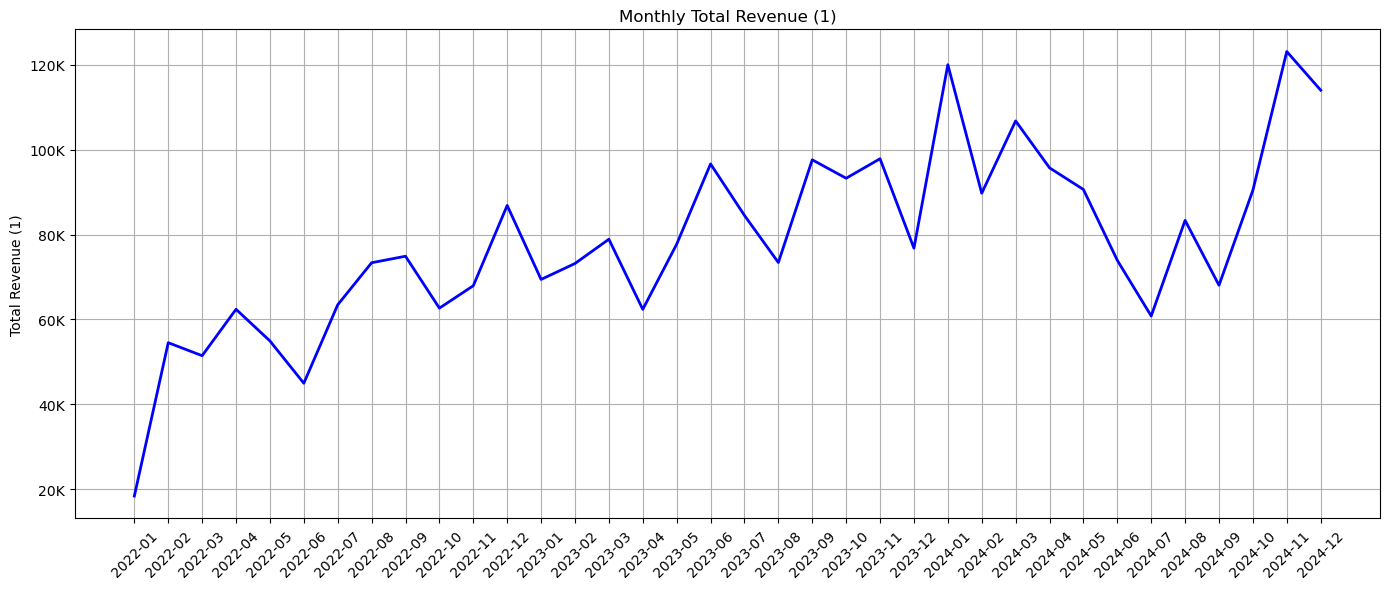

In [13]:
# Aylık Revenue (1) Toplamı

df["YearMonth"] = df["Date"].dt.to_period("M")

monthly_revenue1 = df.groupby("YearMonth")["Revenue (1)"].sum().reset_index()

monthly_revenue1["YearMonth"] = monthly_revenue1["YearMonth"].astype(str)

def thousands(x, pos):    # y ekseninin okunabilirliğini artırmak için
    return f"{x * 1e-3:.0f}K"

plt.figure(figsize=(14, 6))
plt.plot(monthly_revenue1["YearMonth"], monthly_revenue1["Revenue (1)"], color="blue", linewidth=2)
plt.title("Monthly Total Revenue (1)")
plt.ylabel("Total Revenue (1)")
plt.xticks(rotation=45)
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands))
plt.tight_layout()
plt.show()


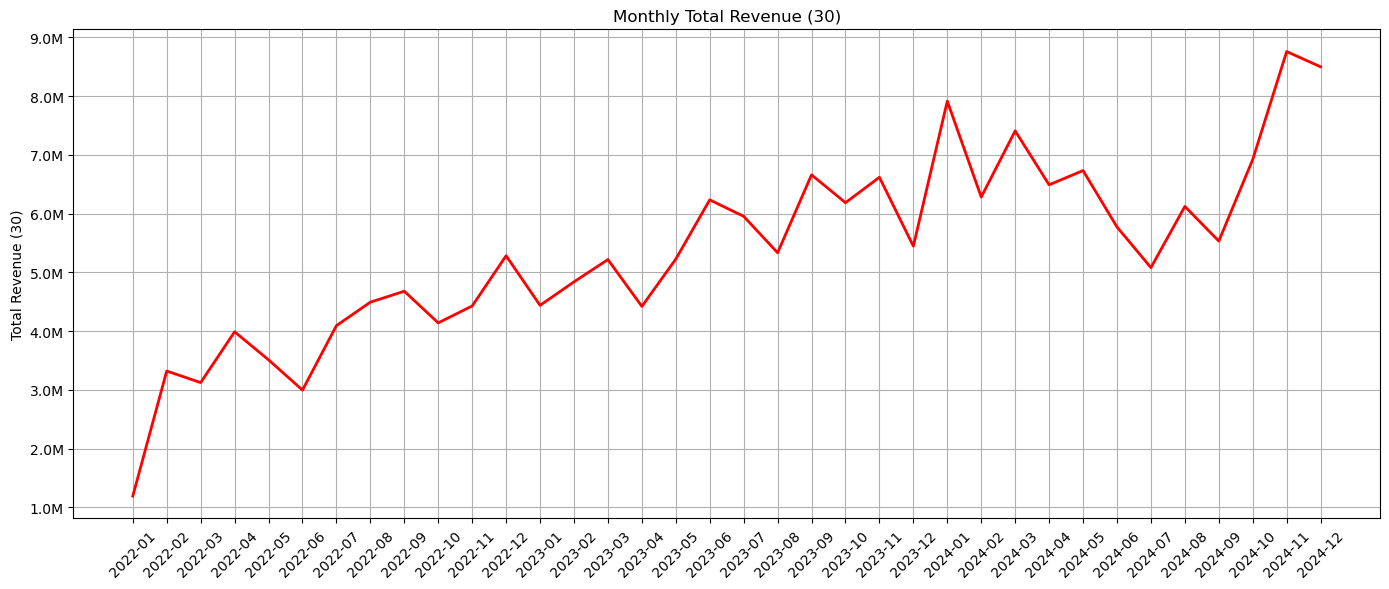

In [14]:
# Aylık Revenue (30) Toplamı

monthly_revenue30 = df.groupby("YearMonth")["Revenue (30)"].sum().reset_index()
monthly_revenue30["YearMonth"] = monthly_revenue30["YearMonth"].astype(str)

def millions(x, pos):   #burası y eksenini milyon bazında göstermek için yapıldı.
    return f"{x * 1e-6:.1f}M" 

plt.figure(figsize=(14, 6))
plt.plot(monthly_revenue30["YearMonth"], monthly_revenue30["Revenue (30)"], color="red", linewidth=2)
plt.title("Monthly Total Revenue (30)")
plt.ylabel("Total Revenue (30)")
plt.xticks(rotation=45)
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.tight_layout()
plt.show()


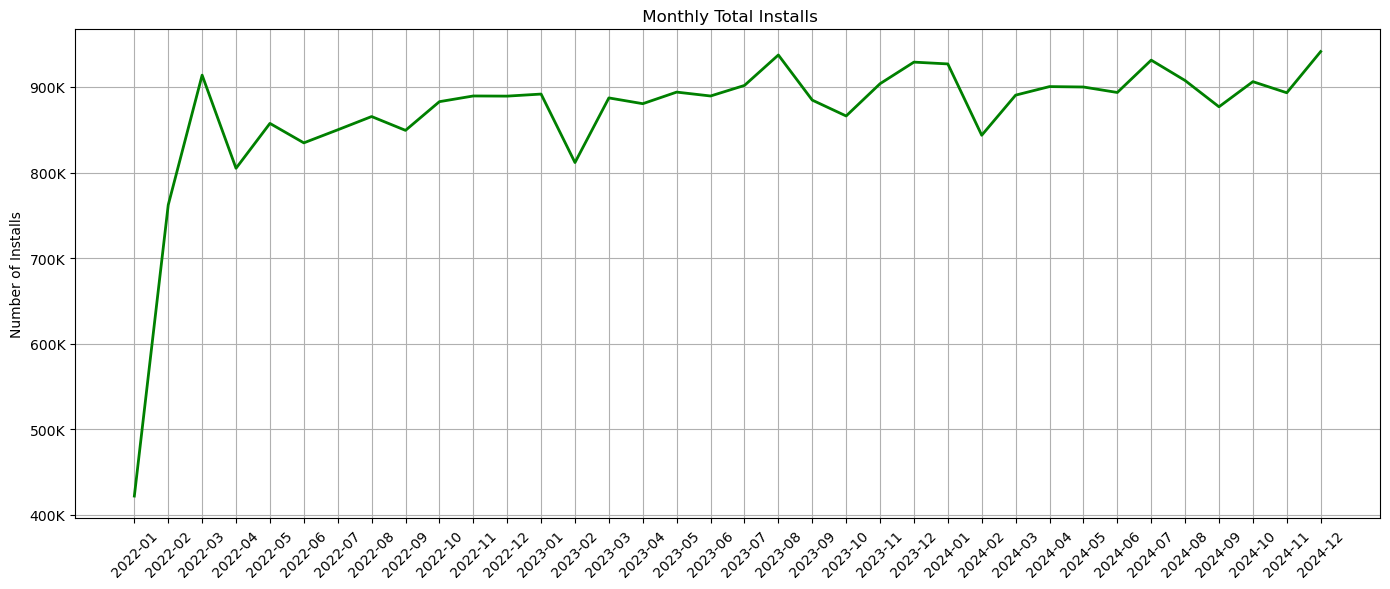

In [15]:
#  Aylık Toplam Install

monthly_installs = df.groupby("YearMonth")["Install"].sum().reset_index()
monthly_installs["YearMonth"] = monthly_installs["YearMonth"].astype(str)

def thousands(x, pos):
    return f"{x * 1e-3:.0f}K"

plt.figure(figsize=(14, 6))
plt.plot(monthly_installs["YearMonth"], monthly_installs["Install"], color="green", linewidth=2)
plt.title(" Monthly Total Installs")
plt.ylabel("Number of Installs")
plt.xticks(rotation=45)
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands))
plt.tight_layout()
plt.show()


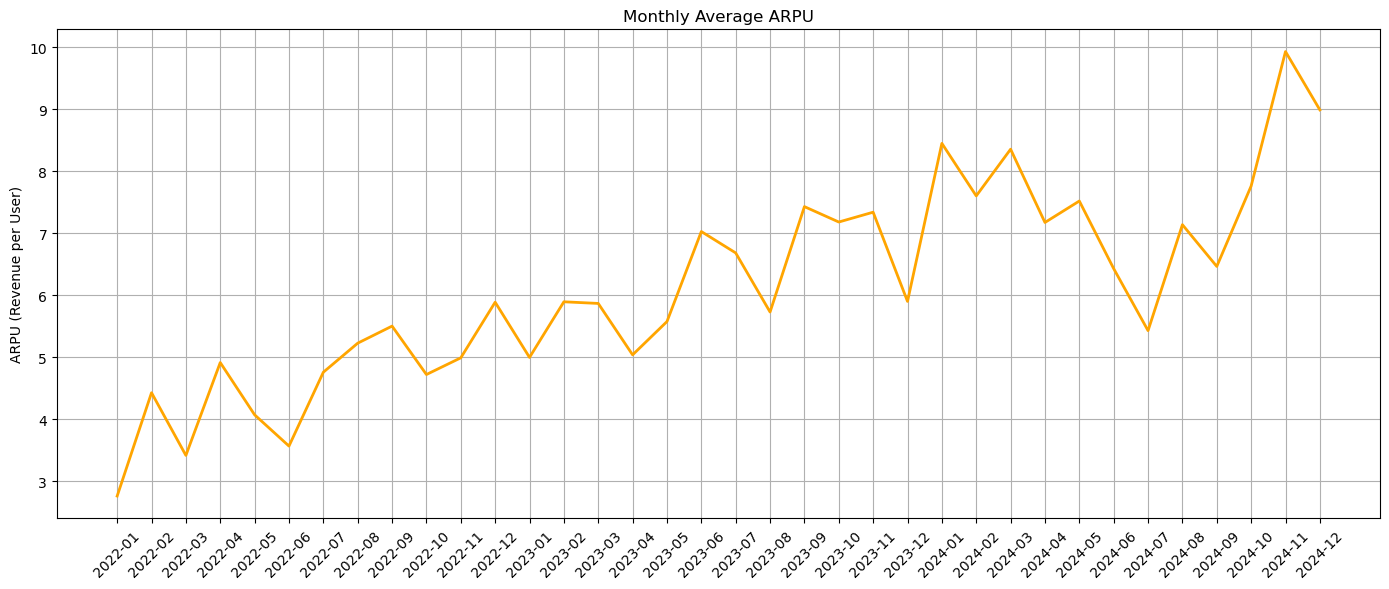

In [16]:
# Aylık Average Revenue Per User Ortalamsı

monthly_arpu = df.groupby("YearMonth")["ARPU"].mean().reset_index()
monthly_arpu["YearMonth"] = monthly_arpu["YearMonth"].astype(str)

plt.figure(figsize=(14, 6))
plt.plot(monthly_arpu["YearMonth"], monthly_arpu["ARPU"], color="orange", linewidth=2)
plt.title("Monthly Average ARPU")
plt.ylabel("ARPU (Revenue per User)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

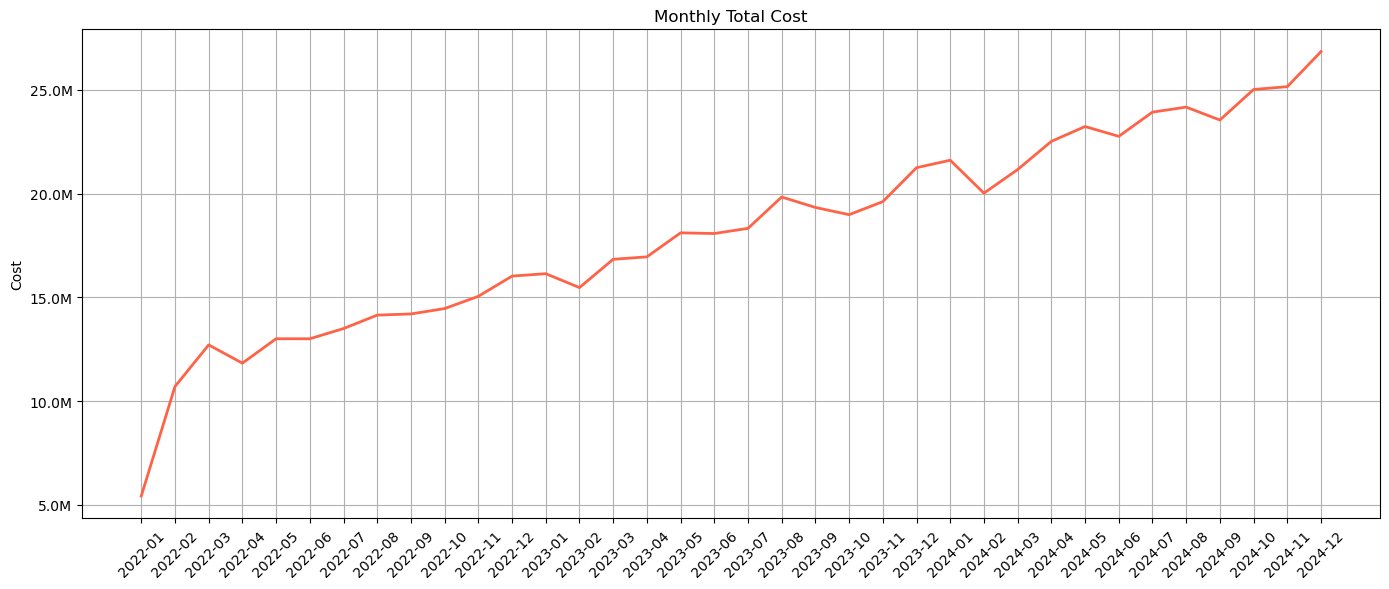

In [17]:
# Aylık toplam Cost

monthly_cost = df.groupby("YearMonth")["Cost"].sum().reset_index()
monthly_cost["YearMonth"] = monthly_cost["YearMonth"].astype(str)

def millions(x, pos):   #burası y eksenini milyon bazında göstermek için yapıldı.
    return f"{x * 1e-6:.1f}M" 

plt.figure(figsize=(14, 6))
plt.plot(monthly_cost["YearMonth"], monthly_cost["Cost"], color="tomato", linewidth=2)
plt.title("Monthly Total Cost")
plt.ylabel("Cost")
plt.xticks(rotation=45)
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.tight_layout()
plt.show()

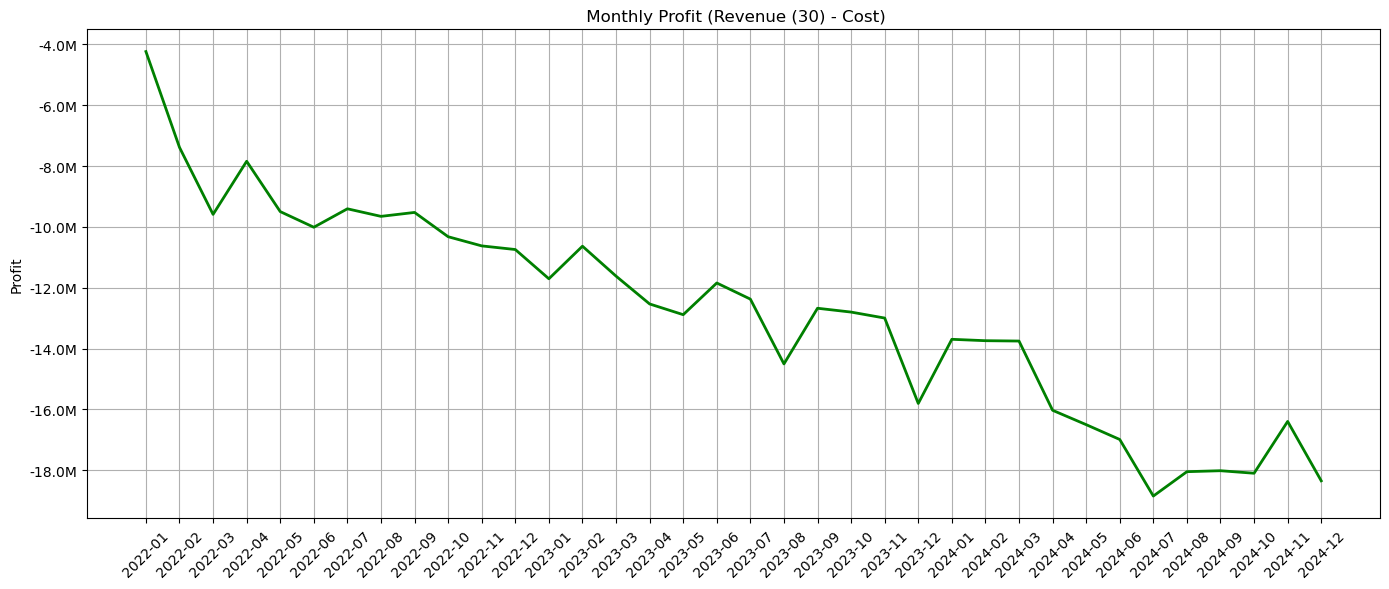

In [18]:
# Aylık Karlılık Grafiği

monthly_revenue_cost = df.groupby("YearMonth")[["Revenue (30)", "Cost"]].sum().reset_index()
monthly_revenue_cost["YearMonth"] = monthly_revenue_cost["YearMonth"].astype(str)

monthly_revenue_cost["Profit"] = monthly_revenue_cost["Revenue (30)"] - monthly_revenue_cost["Cost"]

def millions(x, pos):   #burası y eksenini milyon bazında göstermek için yapıldı.
    return f"{x * 1e-6:.1f}M" 

plt.figure(figsize=(14, 6))
plt.plot(monthly_revenue_cost["YearMonth"], monthly_revenue_cost["Profit"], color="green", linewidth=2)
plt.title(" Monthly Profit (Revenue (30) - Cost)")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.tight_layout()
plt.show()

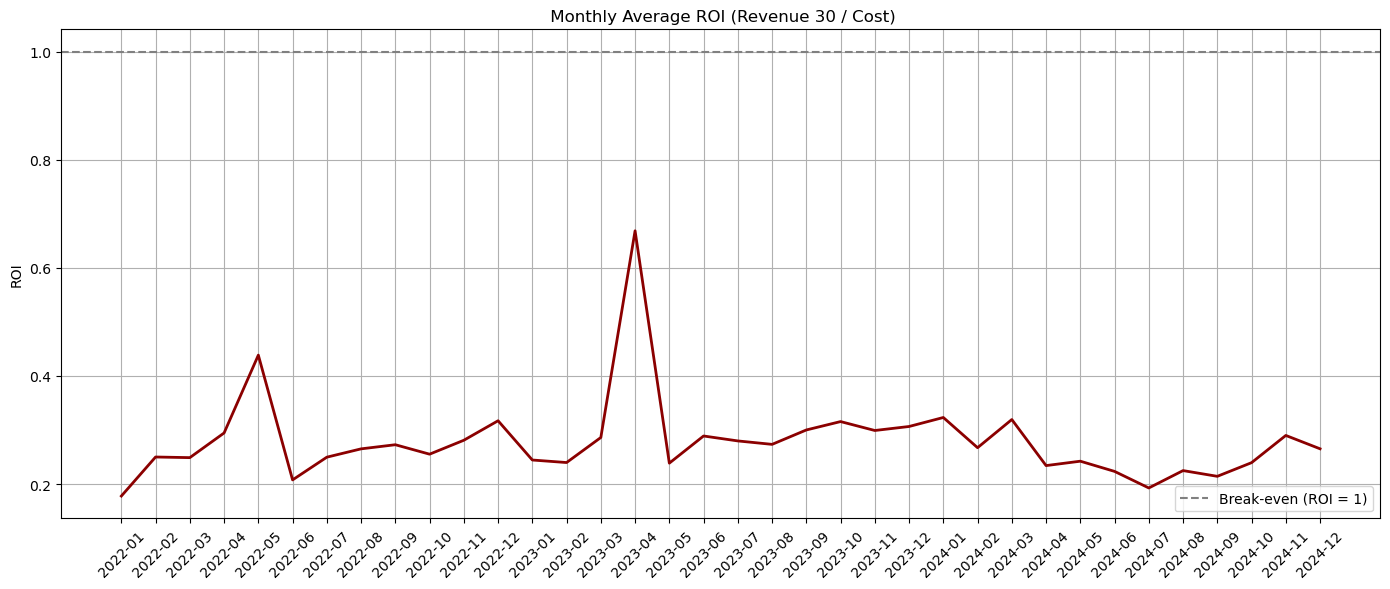

In [19]:
# Aylık ROI Ortalaması

monthly_roi = df.groupby("YearMonth")["ROI"].mean().reset_index()
monthly_roi["YearMonth"] = monthly_roi["YearMonth"].astype(str)


plt.figure(figsize=(14, 6))
plt.plot(monthly_roi["YearMonth"], monthly_roi["ROI"], color="darkred", linewidth=2)
plt.title(" Monthly Average ROI (Revenue 30 / Cost)")
plt.ylabel("ROI")
plt.xticks(rotation=45)
plt.grid(True)
plt.axhline(1.0, color="gray", linestyle="--", label="Break-even (ROI = 1)")
plt.legend()
plt.tight_layout()
plt.show()

Grafiklerin açıklamaları raporda verilmiştir. Modele devam edelim;

In [20]:
# Sadece sayısal sütunlar
numeric_df = df.select_dtypes(include=["float64", "int64"]).copy()

numeric_df = numeric_df.dropna()


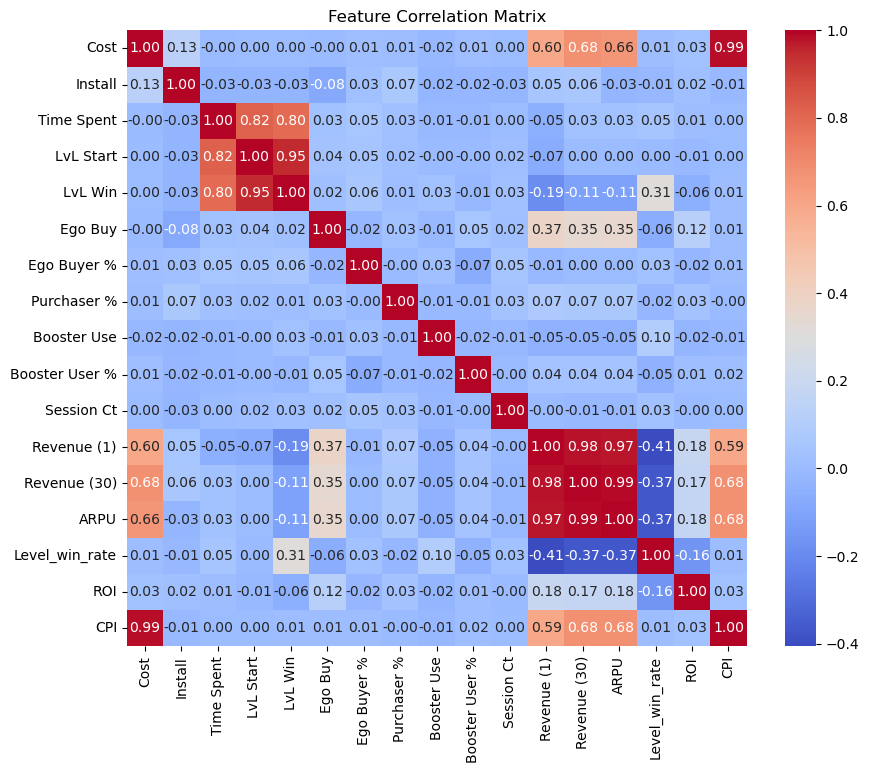

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

Modeli sadeleştirmek adına yüksek korelasyona sahip bazı featureları çıkartıyorum. Revenue(1), ARPU, CPI, Level Start ve Level Win (bu ikisinin yerine level win rate alıyorum)

In [22]:
df = df.drop(columns=["Revenue (1)", "ROI", "ARPU", "CPI", "LvL Start", "LvL Win"])


OUTLIER ANALİZİ

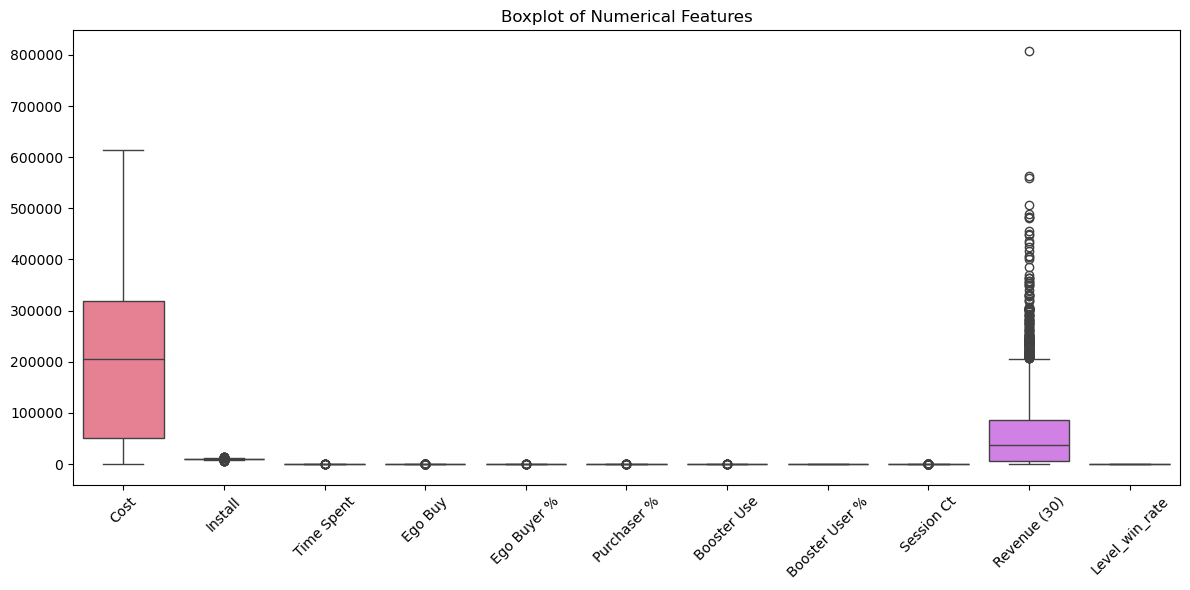

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include="number"))
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.tight_layout()
plt.show()


Revenue(30)'da aykırı değerleri ayıklamalıyız.

In [24]:
Q1 = df["Revenue (30)"].quantile(0.25)
Q3 = df["Revenue (30)"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df["Revenue (30)"] >= lower) & (df["Revenue (30)"] <= upper)].reset_index(drop=True)

In [25]:
df = pd.get_dummies(df, columns=["Tier"])


In [26]:
# 2022-01 ayını modeli yanlış etkilememesi için veri setinden çıkarıyorum, çünkü yarım ay.
df = df[df["Date"].dt.to_period("M") != pd.Period("2022-01")]

In [27]:
df = df.sort_values("Date").reset_index(drop=True)


In [28]:
df = df.drop(columns=["Date", "YearMonth"], axis=1)

In [29]:
df   #df'in son hali, modele hazır

,Cost,Install,Time Spent,Ego Buy,Ego Buyer %,Purchaser %,Booster Use,Booster User %,Session Ct,Revenue (30),Level_win_rate,Tier_Row,Tier_Tier 1,Tier_US
0,209432.982781,9565,75.801036,4.073722,0.500829,0.008315,4.006522,0.859857,3.213923,89103.964891,0.895422,False,False,True
1,65293.131067,9565,75.801036,4.073722,0.500829,0.008315,4.006522,0.859857,3.213923,25404.023058,0.895422,False,True,False
2,140589.963165,12205,47.297791,1.729993,0.470666,0.008716,5.891741,0.789984,2.344664,17277.696892,0.864682,False,True,False
3,27849.244908,12205,47.297791,1.729993,0.470666,0.008716,5.891741,0.789984,2.344664,1047.856863,0.864682,True,False,False
4,324569.875121,12205,47.297791,1.729993,0.470666,0.008716,5.891741,0.789984,2.344664,55654.778594,0.864682,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,296000.484893,10299,69.058530,5.504687,0.548464,0.011892,11.233088,0.708544,1.000000,114975.376797,0.887557,False,True,False
2918,38678.204077,10299,69.058530,5.504687,0.548464,0.011892,11.233088,0.708544,1.000000,8364.000216,0.887557,True,False,False
2919,356535.164035,11451,67.923432,4.484201,0.498311,0.012899,11.972387,0.515250,2.016223,78389.446972,0.932873,False,True,False
2920,585555.164035,11451,67.923432,4.484201,0.498311,0.012899,11.972387,0.515250,2.016223,139151.355743,0.932873,False,False,True


In [30]:
y = df["Revenue (30)"]
x = df.drop(columns=["Revenue (30)"]) 


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

lr_model = LinearRegression()
tscv = TimeSeriesSplit(n_splits=5)

cv_scores = cross_val_score(lr_model, x_scaled, y, cv=tscv, scoring="r2")

print("TimeSeriesSplit R² Scores:")
for i, score in enumerate(cv_scores, 1):
    print(f"  Fold {i}: {score:.4f}")
print("Mean R²:", round(np.mean(cv_scores), 4))
print("Std Dev:", round(np.std(cv_scores), 4))


TimeSeriesSplit R² Scores:
  Fold 1: 0.7471
  Fold 2: 0.7648
  Fold 3: 0.7716
  Fold 4: 0.7593
  Fold 5: 0.7385
Mean R²: 0.7562
Std Dev: 0.0119


Linear Regression bu veri için uygun değil. Devam edelim.

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

rf_model = RandomForestRegressor(random_state=10)

tscv = TimeSeriesSplit(n_splits=5)
cv_scores = cross_val_score(rf_model, x, y, cv=tscv, scoring="r2")

# Sonuçlar
print("TimeSeriesSplit R² Scores:")
for i, score in enumerate(cv_scores, 1):
    print(f"  Fold {i}: {score:.4f}")
print(" Mean R²:", round(np.mean(cv_scores), 4))
print("Std Dev:", round(np.std(cv_scores), 4))


TimeSeriesSplit R² Scores:
  Fold 1: 0.9033
  Fold 2: 0.8834
  Fold 3: 0.9172
  Fold 4: 0.9410
  Fold 5: 0.9460
 Mean R²: 0.9182
Std Dev: 0.0234


In [34]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=11)

tscv = TimeSeriesSplit(n_splits=10)
cv_scores = cross_val_score(xgb_model, x, y, cv=tscv, scoring="r2")

# Sonuçlar
print("TimeSeriesSplit R² Scores:")
for i, score in enumerate(cv_scores, 1):
    print(f"  Fold {i}: {score:.4f}")
print("Mean R²:", round(np.mean(cv_scores), 4))
print("Std Dev:", round(np.std(cv_scores), 4))


TimeSeriesSplit R² Scores:
  Fold 1: 0.8840
  Fold 2: 0.9323
  Fold 3: 0.9154
  Fold 4: 0.9254
  Fold 5: 0.9301
  Fold 6: 0.9333
  Fold 7: 0.9507
  Fold 8: 0.9530
  Fold 9: 0.9618
  Fold 10: 0.9497
Mean R²: 0.9336
Std Dev: 0.0214


In [35]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(random_state=10)

tscv = TimeSeriesSplit(n_splits=10)
cv_scores = cross_val_score(lgb_model, x, y, cv=tscv, scoring="r2")

# Sonuçlar
print("TimeSeriesSplit R² Scores:")
for i, score in enumerate(cv_scores, 1):
    print(f"  Fold {i}: {score:.4f}")
print("Mean R²:", round(np.mean(cv_scores), 4))
print("Std Dev:", round(np.std(cv_scores), 4))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 786
[LightGBM] [Info] Number of data points in the train set: 272, number of used features: 13
[LightGBM] [Info] Start training from score 37995.566332
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

Lineer Regresyon, Random Forest, XgBoost ve LightGBM modellerinin sonuçlarını karşılaştırdığımızda, en iyi performansı Lightgbm ile aldık. 